# Importing Libraries

In [197]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
import pingouin as pg
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['legend.labelcolor'] = 'black'

In [198]:
df = pd.read_csv(r'C:\Users\User\Desktop\smoking.csv')

In [199]:
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


# Data Cleaning and Wrangling

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


In [201]:
df.drop(columns=['amt_weekends', 'amt_weekdays', 'type'], inplace=True)

In [202]:
df.isnull().sum()

Unnamed: 0               0
gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
dtype: int64

In [203]:
unique_elements = {}

for column in df.columns:
    if column != 'age':
        unique_elements[column] = df[column].unique()

unique_elements

{'Unnamed: 0': array([   1,    2,    3, ..., 1689, 1690, 1691], dtype=int64),
 'gender': array(['Male', 'Female'], dtype=object),
 'marital_status': array(['Divorced', 'Single', 'Married', 'Widowed', 'Separated'],
       dtype=object),
 'highest_qualification': array(['No Qualification', 'Degree', 'GCSE/O Level', 'GCSE/CSE',
        'Other/Sub Degree', 'Higher/Sub Degree', 'ONC/BTEC', 'A Levels'],
       dtype=object),
 'nationality': array(['British', 'English', 'Scottish', 'Other', 'Welsh', 'Irish',
        'Refused', 'Unknown'], dtype=object),
 'ethnicity': array(['White', 'Mixed', 'Black', 'Refused', 'Asian', 'Chinese',
        'Unknown'], dtype=object),
 'gross_income': array(['2,600 to 5,200', 'Under 2,600', '28,600 to 36,400',
        '10,400 to 15,600', '15,600 to 20,800', 'Above 36,400',
        '5,200 to 10,400', 'Refused', '20,800 to 28,600', 'Unknown'],
       dtype=object),
 'region': array(['The North', 'Midlands & East Anglia', 'London', 'South East',
        'South West

In [204]:
def parse_null(table):
    table = table.copy()
    for column in table.columns:
        table[column] = table[column].apply(func=lambda x: np.nan if x in ['Refused', 'Unknown'] else x)
    return table

In [205]:
df = parse_null(df).copy()

In [206]:
df.drop(columns=df.columns[0], inplace=True)

In [207]:
# Transforming the smoke column into 0 and 1.

df['smoke'] = df['smoke'].apply(func=lambda x: 1 if x == 'Yes' else 0)

In [208]:
df.describe(include='all').replace({np.nan: '---'})

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
count,1691,1691.0,1691,1691,1673,1676,1565,1691,1691.0
unique,2,---,5,8,6,5,8,7,---
top,Female,---,Married,No Qualification,English,White,"5,200 to 10,400",Midlands & East Anglia,---
freq,965,---,812,586,833,1560,396,443,---
mean,---,49.836192,---,---,---,---,---,---,0.248965
std,---,18.736851,---,---,---,---,---,---,0.432541
min,---,16.0,---,---,---,---,---,---,0.0
25%,---,34.0,---,---,---,---,---,---,0.0
50%,---,48.0,---,---,---,---,---,---,0.0
75%,---,65.5,---,---,---,---,---,---,0.0


# Some Relations I would like to discover:
1) Relationship between each factor and smoking. \
2) Which age group tends to smoke most? \
3) Do regions affect the smoking tendencies? \
4) How does ethnicity affect smoking habits? \
5) Do ethnicites relate to smoking habits differently in different regions? \
6) What about qualification? Can a higher qualification change smoking habits? \
7) Does Marital Status affect the rates of smoking in genders?

In [209]:
df

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,0
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,1
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,0
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,0
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,0
...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,0
1687,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,1
1688,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,0
1689,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,1


# Relationship between each factor and smoking

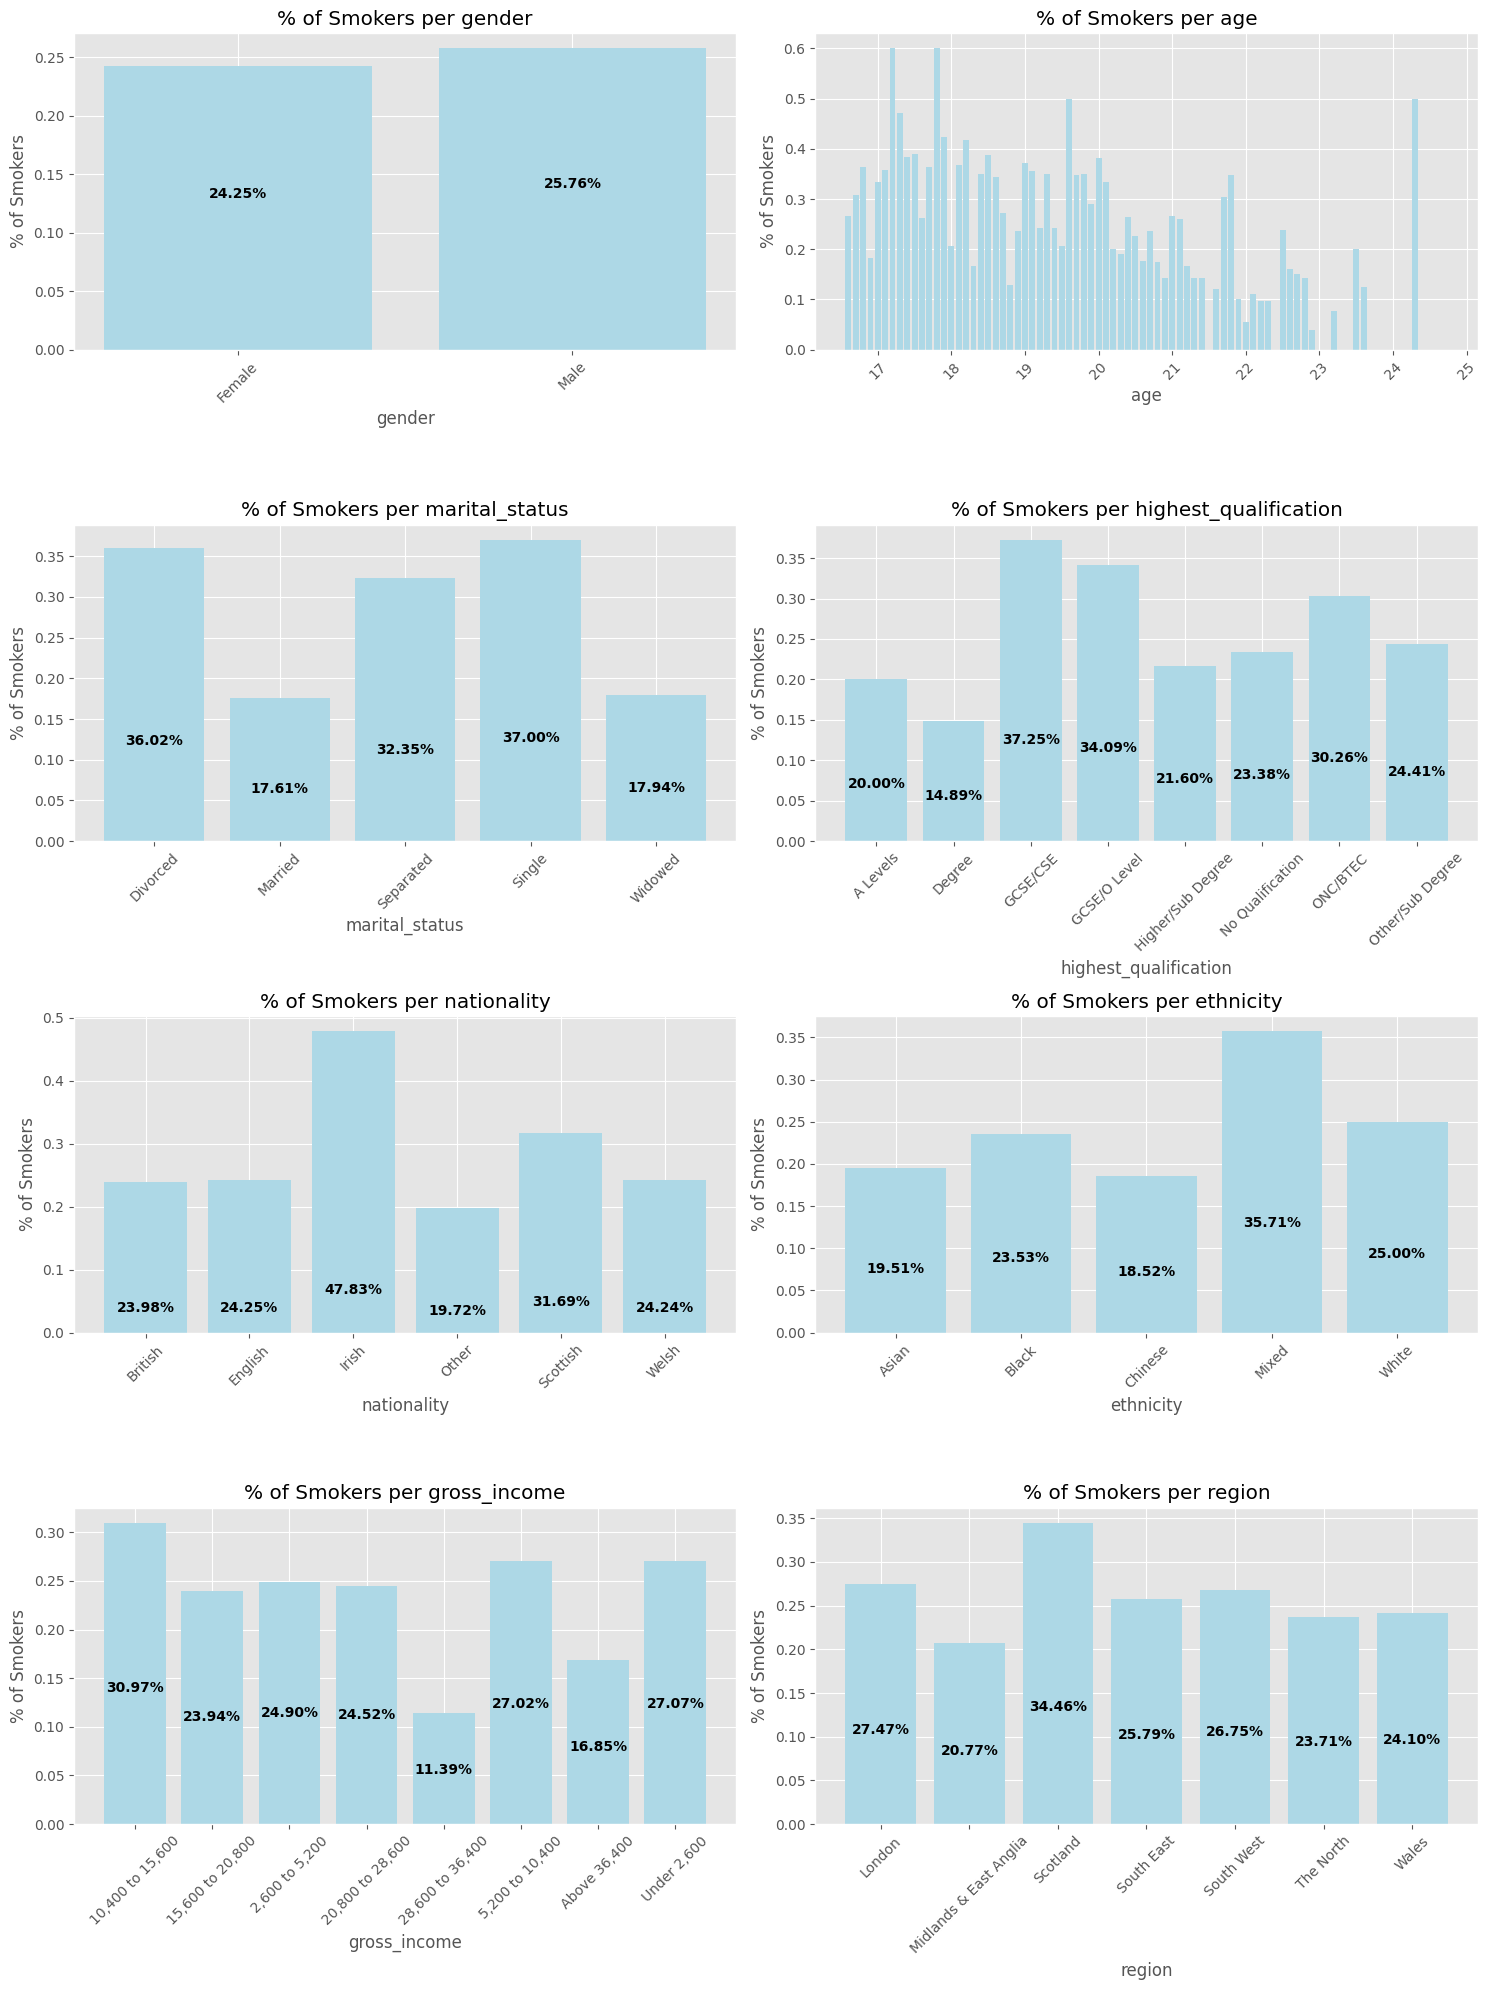

In [210]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20), constrained_layout=True)
columns = df.columns

for i in range(len(columns)):
    if columns[i] != 'smoke':
        table = df.groupby(columns[i]).agg({
            'smoke': 'mean'
        }).reset_index()

        bars = axs[i // 2][i % 2].bar(table[columns[i]], table['smoke'], color='lightblue')
        axs[i // 2][i % 2].set_xticklabels(table[columns[i]], rotation=45)
        axs[i // 2][i % 2].set_title(f'% of Smokers per {columns[i]}', color='black')
        axs[i // 2][i % 2].set_ylabel('% of Smokers')
        axs[i // 2][i % 2].set_xlabel(f'{columns[i]}')
        
        if columns[i] != 'age':
            for bar in bars:
                height = bar.get_height()
                axs[i // 2][i % 2].annotate(f'{100*height:.2f}%', 
                                           xy=(bar.get_x() + bar.get_width() / 2, height),
                                           xytext=(0, -height*400),
                                           textcoords="offset points",
                                           ha='center', va='bottom',
                                           weight='bold', color='black')

plt.tight_layout()
plt.show()

#### If we let $\bar{X}$ be the sample proportion of smokers for any of the given features, and if we assume $X \rightarrow \mathcal{S}(\mu, \sigma^2)$ for some probability distribution $\mathcal{S}$, then, supposing we have a sufficiently large sample size $n$, the Central Limit Theorem ensures that the sample proportion is approximately normal with $\bar{X} \rightarrow \mathcal{N}(\mu, \displaystyle\frac{\sigma^2}{n})$.

### Analysis of Categorical Variables

In [211]:
# Conducting a Games-Howell mean difference test, assumes normal/approximately normally distributed sample means, does not contraint the variances.

columns = df.columns[~df.columns.isin(['age', 'smoke'])]

games_howell_results_by_column = { \
    column: pg.pairwise_gameshowell(data=df[[column, 'smoke']][~df[column].isna()], dv='smoke', between=column) \
    for column in columns
}

games_howell_results_by_column_rejected = {
    column: games_howell_results_by_column[column][games_howell_results_by_column[column]['pval'] < 0.05]
    for column in columns
}

In [212]:
# Conducting a Tukey HSD mean difference test, assumes normal/approximately normally distributed sample means AND equal variances.


def tukey_tableau_to_df(table):
    table = table.summary().data
    table = pd.DataFrame(table)
    table.columns = table.iloc[0]
    table.drop(0, inplace=True)
    return table

tukey_results_by_column = {
    column: tukey_tableau_to_df(pairwise_tukeyhsd(df['smoke'][~df[column].isna()], df[column][~df[column].isna()]))
    for column in columns
}

tukey_results_by_column_rejected = {
    column: tukey_results_by_column[column][tukey_results_by_column[column]['reject'] == True].drop(columns='reject')
    for column in columns
}

In [213]:
# Finding the columns in which the tests differed.

tukey_counter = [(column, len(tukey_results_by_column_rejected[column])) for column in columns]
games_howell_counter = [(column, len(games_howell_results_by_column_rejected[column])) for column in columns]

for i in range(7):
    if tukey_counter[i][1] != games_howell_counter[i][1]:
        print(games_howell_counter[i][0])

marital_status
gross_income


In [214]:
tables_with_rejections = [(column, games_howell_results_by_column_rejected[column].reset_index().drop(columns='index')) for column in columns if len(games_howell_results_by_column_rejected[column]) > 0]

for table in tables_with_rejections:
    display(Markdown(f"### {table[0]}:"))
    display(table[1])

### marital_status:

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Divorced,Married,0.360248,0.176108,0.184140,0.040241,4.575926,201.599994,8.052466e-05,0.460644
1,Divorced,Widowed,0.360248,0.179372,0.180876,0.045864,3.943770,295.999947,9.453746e-04,0.421915
2,Married,Single,0.176108,0.370023,-0.193915,0.026946,-7.196341,710.222661,1.613243e-11,-0.462328
3,Single,Widowed,0.370023,0.179372,0.190651,0.034789,5.480270,545.873584,6.464581e-07,0.421350


### highest_qualification:

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Degree,GCSE/CSE,0.148855,0.372549,-0.223694,0.052914,-4.227535,145.336796,0.001061,-0.562375
1,Degree,GCSE/O Level,0.148855,0.340909,-0.192054,0.034890,-5.504545,559.686618,0.000002,-0.451726
2,GCSE/O Level,No Qualification,0.340909,0.233788,0.107121,0.032220,3.324715,565.661377,0.021038,0.242213


### gross_income:

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,"10,400 to 15,600","28,600 to 36,400",0.309701,0.113924,0.195777,0.045770,4.277442,183.818320,0.000785,0.449129
1,"28,600 to 36,400","5,200 to 10,400",0.113924,0.270202,-0.156278,0.042348,-3.690285,145.507452,0.007444,-0.365789


### region:

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Midlands & East Anglia,Scotland,0.207675,0.344595,-0.13692,0.043688,-3.134014,222.523544,0.031689,-0.321857


## Relevant Bar Charts

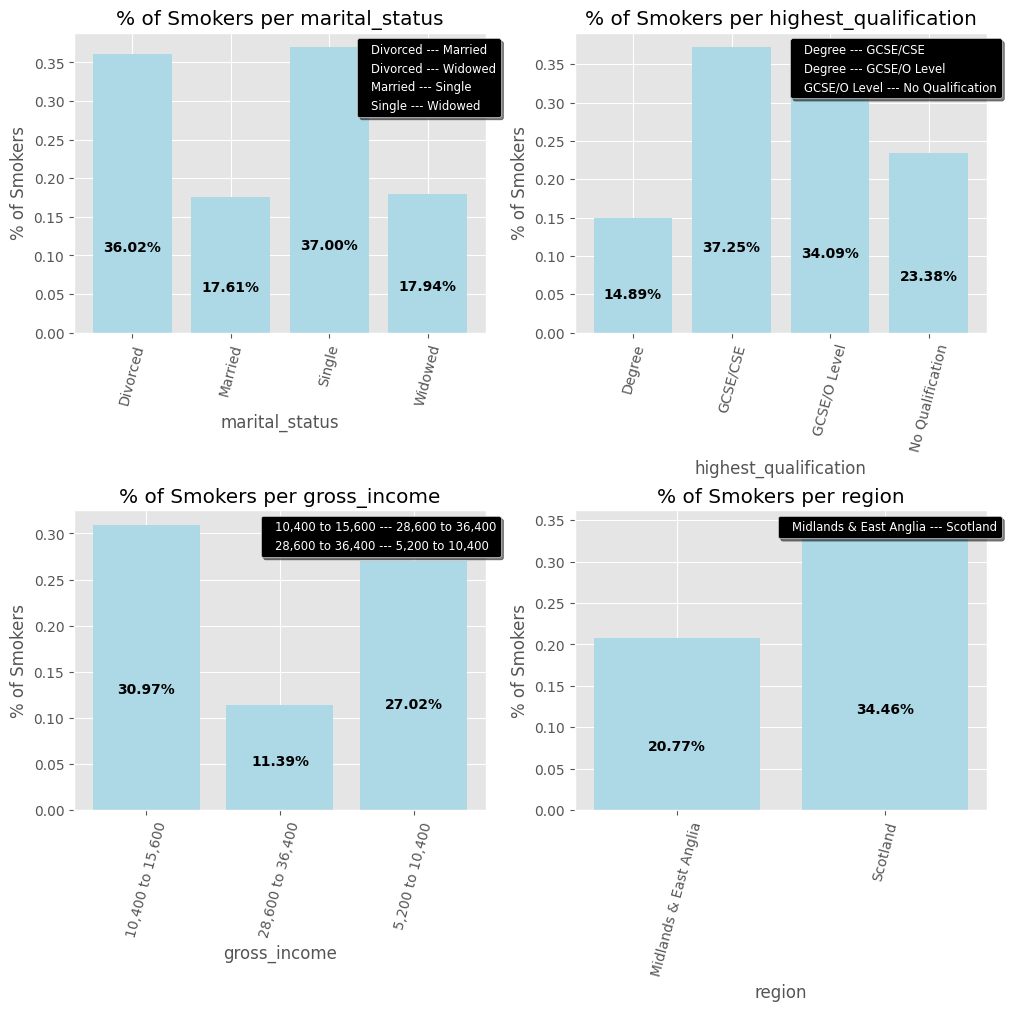

In [218]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)

for i in range(len(tables_with_rejections)):
    relevant_table = df[df[tables_with_rejections[i][0]].isin(set(tables_with_rejections[i][1]['A'].values) | set(tables_with_rejections[i][1]['B'].values))] \
    .groupby(tables_with_rejections[i][0]).agg({ \
        'smoke': 'mean' \
    }).reset_index()

    a, b = [i // 2, i % 2]
    bars = axs[a, b].bar(relevant_table[tables_with_rejections[i][0]], relevant_table['smoke'], color='lightblue')

    axs[a, b].set_title(f'% of Smokers per {tables_with_rejections[i][0]}', color='black')
    axs[a, b].set_xticklabels(axs[a, b].get_xticklabels(), rotation=75)
    axs[a, b].set_xlabel(tables_with_rejections[i][0])
    axs[a, b].set_ylabel('% of Smokers')

    for bar in bars:
        height = bar.get_height()
        axs[a, b].annotate(f'{100*height:.2f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -height*400),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    weight='bold', color='black')

    legend_handles = [plt.bar([], [], color='black', label=f"{tables_with_rejections[i][1]['A'].iloc[j]} --- {tables_with_rejections[i][1]['B'].iloc[j]}") \
                    for j in range(len(tables_with_rejections[i][1]))]

    axs[a, b].legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.05, 1), fancybox=True, shadow=True, fontsize='small', facecolor='black', handlelength=0,
                     labelcolor = 'white')

plt.show()


#### These are now (most probably) expressive of actual discrepancies in smokers distribution. The provided legends provide the statistically significant mean differences.

# Dealing with Age

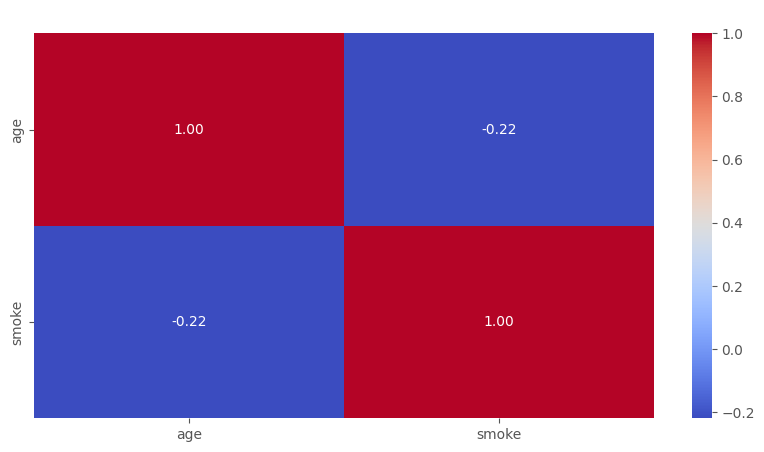

In [219]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[['age', 'smoke']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

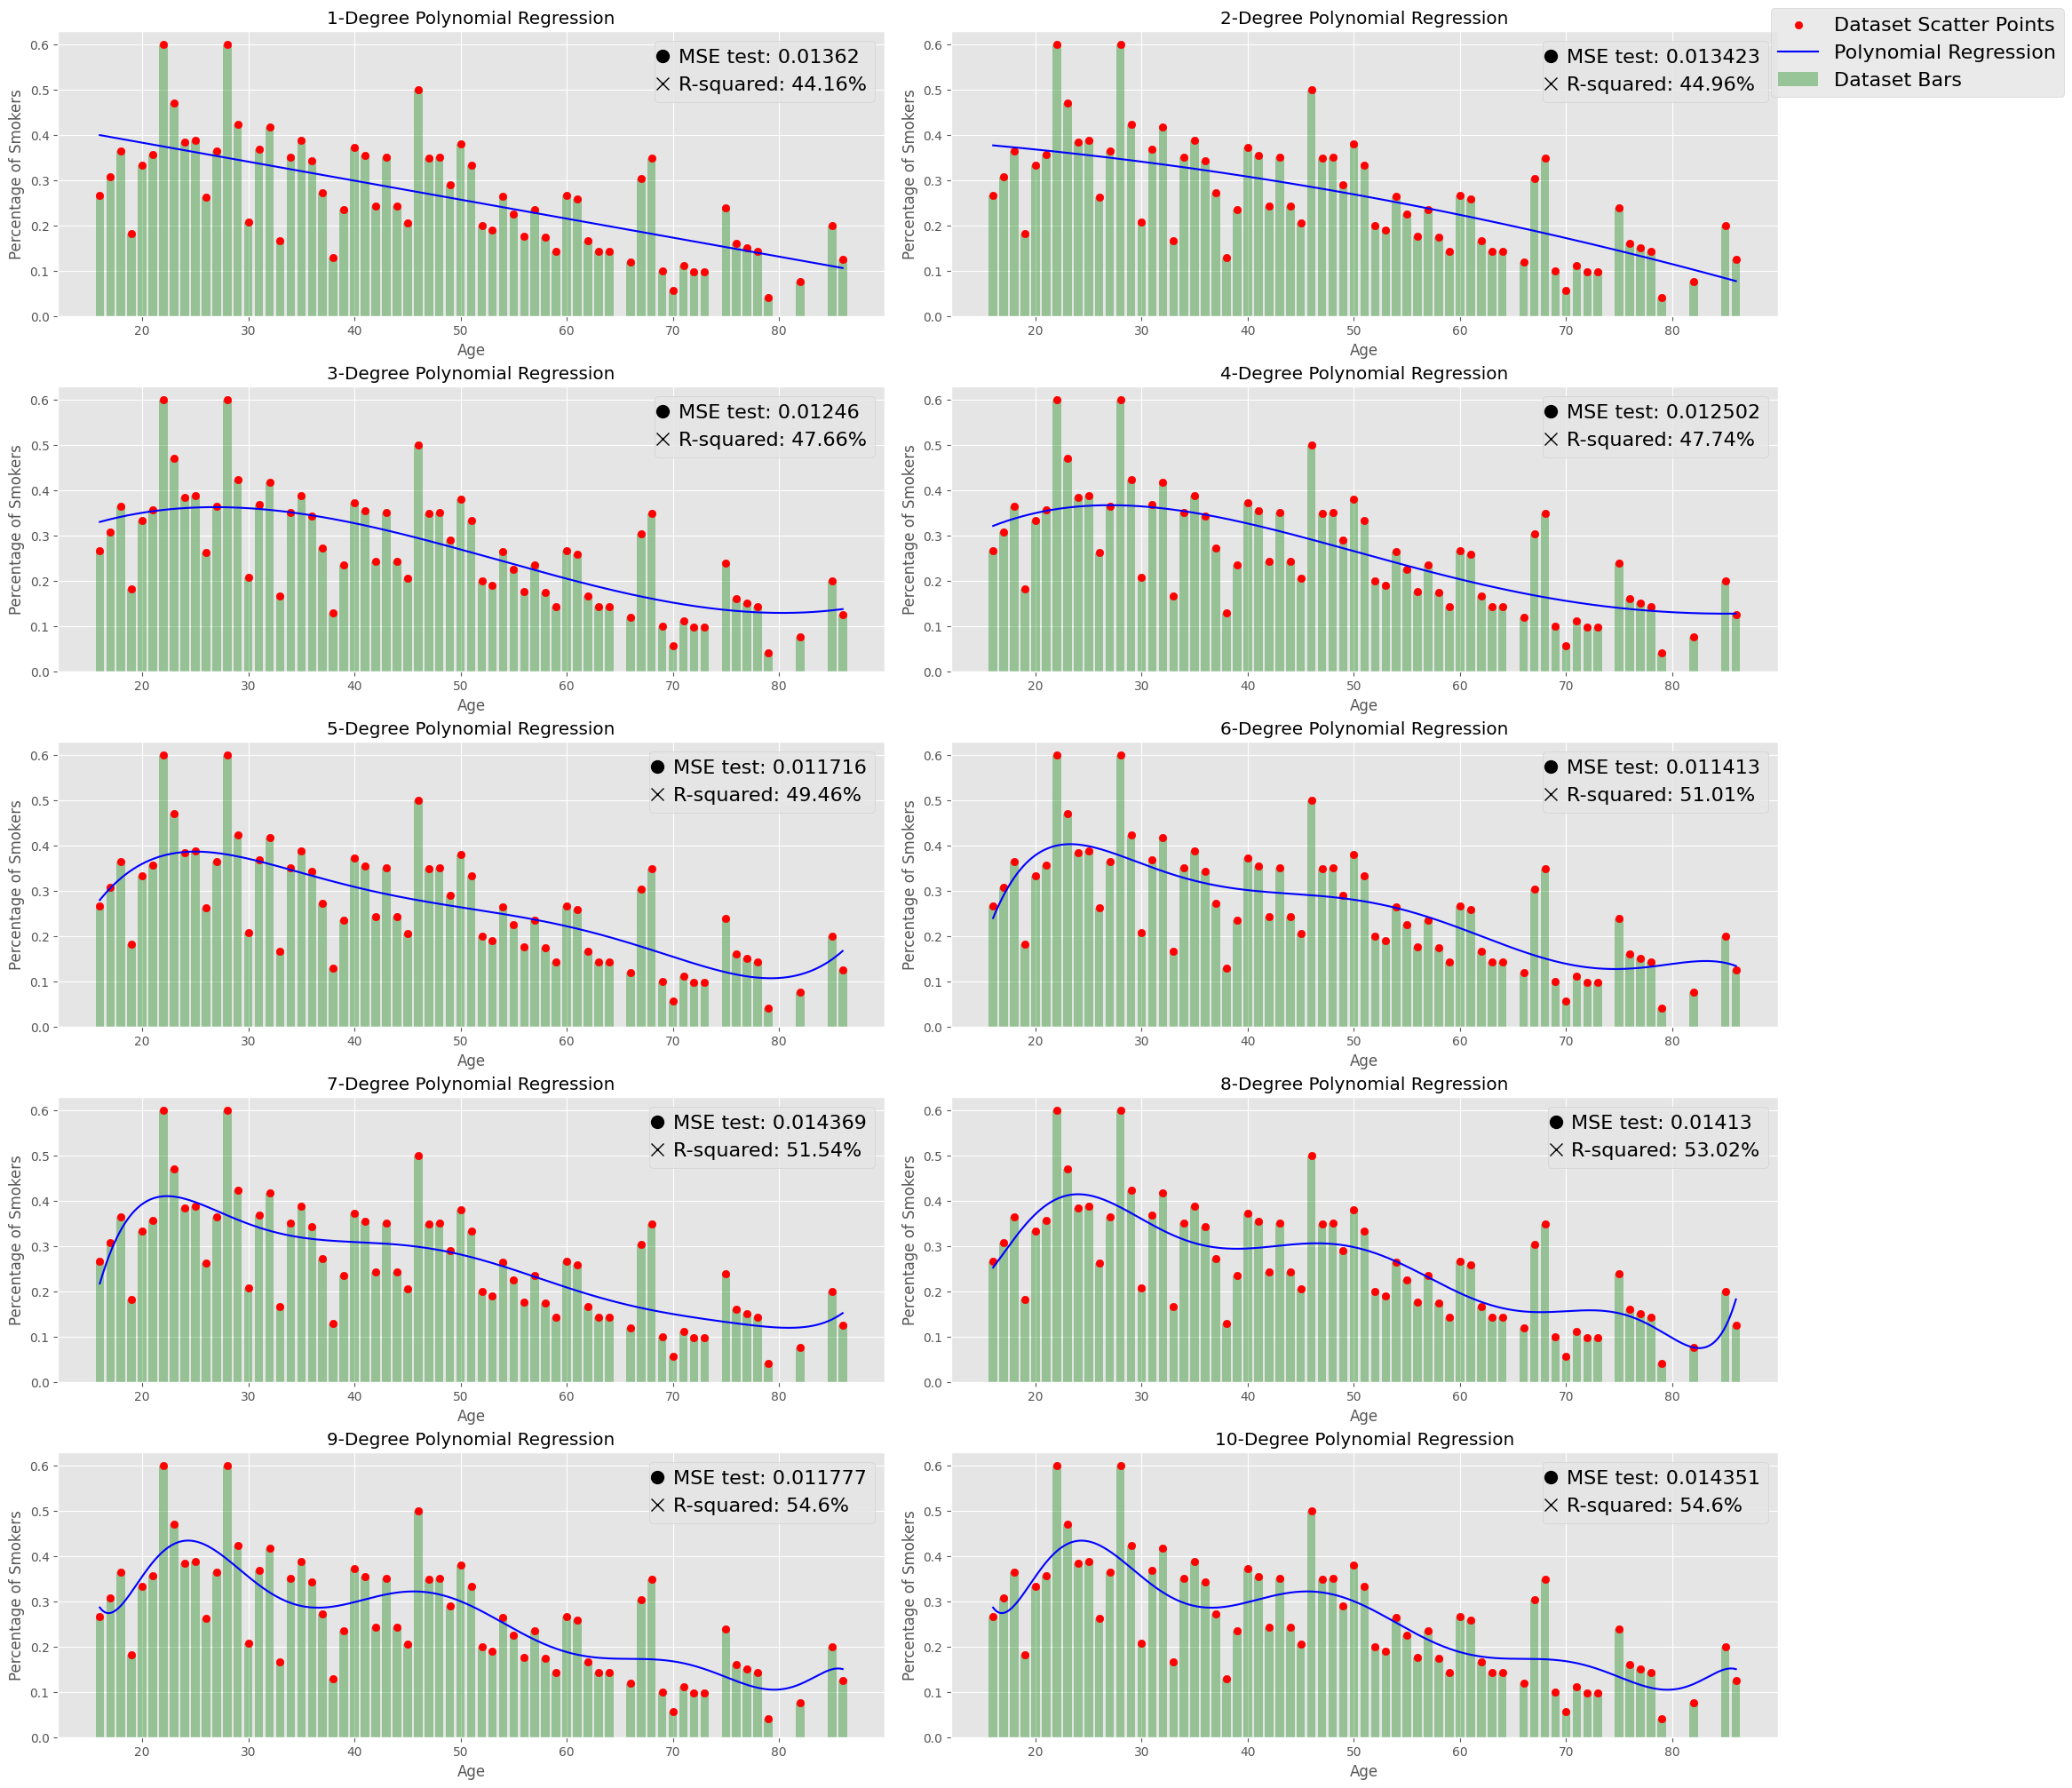

In [259]:
def linear_regression_test_mse(X, y, degree, test_size=0.2, random_state=42):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    linear_regression_coefficients = np.polyfit(x_train, y_train, degree)
    linear_regression = np.poly1d(linear_regression_coefficients)
    y_test_pred = linear_regression(x_test)

    mse_test = np.mean((y_test_pred- y_test)**2)
    return np.round(mse_test, 6)


def linear_regression_rsquared(X, y, y_pred):
    SSR = sum((y_pred - np.mean(y))**2)
    SST = sum((y - np.mean(y))**2)
    
    return np.round(SSR/SST, 4)


temp = \
df.groupby('age').agg({
    'smoke': 'mean'
}).reset_index()

temp = temp[~(temp['smoke'] == 0)][:-1] # age 93 produces a very large reading, for which I consider an outlier

fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
for i in range(10):
    a, b = [i // 2, i % 2]
    axs[a, b].bar(temp['age'], temp['smoke'], color='green', alpha=0.35, label='Dataset Bars')
    axs[a, b].scatter(temp['age'], temp['smoke'], color='red', label='Dataset Scatter Points')

    coefficients = np.polyfit(temp['age'], temp['smoke'], i + 1)
    N_regression = np.poly1d(coefficients)
    rsquared = linear_regression_rsquared(temp['age'], temp['smoke'], N_regression(temp['age']))
    mse_test = linear_regression_test_mse(temp['age'], temp['smoke'], i + 1)
    
    x_values = np.linspace(min(temp['age']), max(temp['age']), 1000)
    y_values = N_regression(x_values)
    
    axs[a, b].plot(x_values, y_values, color='blue', label=f'Polynomial Regression')
    axs[a, b].set_xlabel('Age')
    axs[a, b].set_ylabel('Percentage of Smokers')
    axs[a, b].set_title(f'{i + 1}-Degree Polynomial Regression', color='black')

    axs[a, b].legend(handles=[ \
        plt.Line2D([0], [0], color='black', marker='o', markersize=10, label=f'MSE test: {mse_test}', linestyle='None'), \
        plt.Line2D([0], [0], color='black', marker='x', markersize=10, label=f'R-squared: {str(100*rsquared)[:5]}%', linestyle='None')
    ], fontsize=16, handlelength=0)
    axs[a, b].grid(True)

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.16, 1), borderaxespad=0.1, fontsize=16)

plt.subplots_adjust(top=0.9, bottom=0.2)
plt.show()

#### +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

<Figure size 500x500 with 0 Axes>

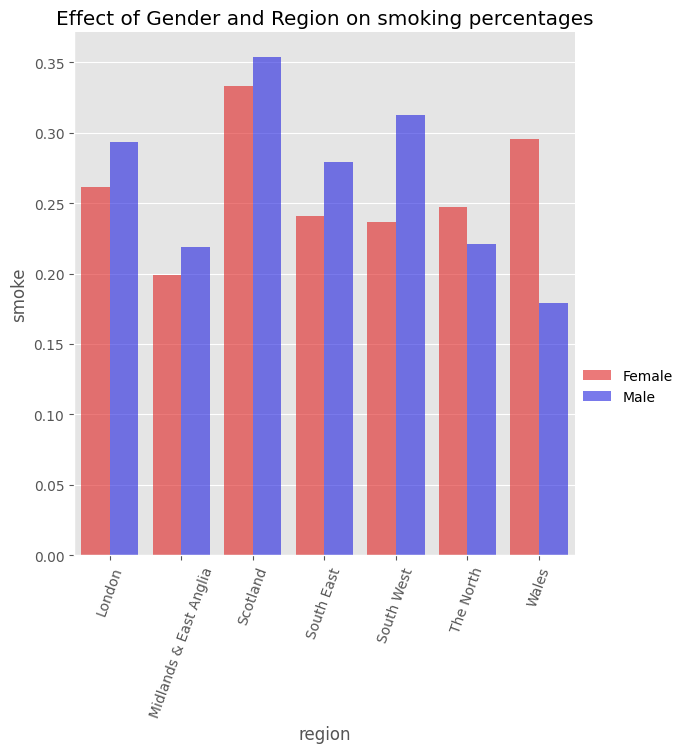

In [239]:
foopa = \
df.groupby(['gender', 'region']).agg({
    'smoke': 'mean'
}).reset_index()

plt.figure(figsize=(5, 5))
sns.catplot( 
    data=foopa, kind="bar",
    x="region", y="smoke", hue="gender",
    errorbar=None, palette=["red", 'blue'], alpha=.6, height=6,
)
plt.xticks(rotation=70)
plt.title("Effect of Gender and Region on smoking percentages", color='black')
plt.show()

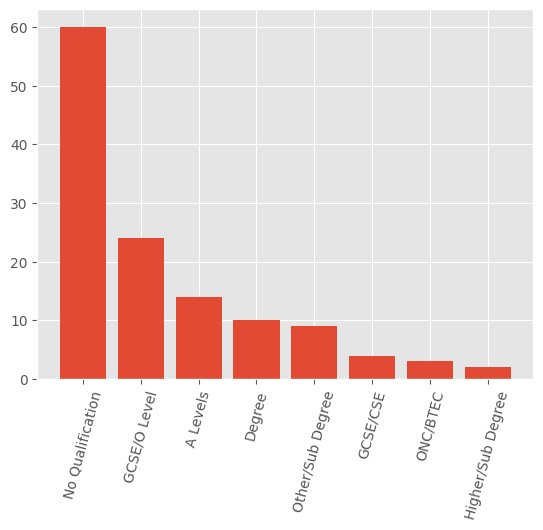

In [253]:
# Of those who did not report their gross income, the majority had no qualifications

qoflatoplex = df[['highest_qualification']][df['gross_income'].isnull()].value_counts().reset_index()
qoflatoplex = pd.DataFrame(qoflatoplex.values, columns=['highest_qualification', 'count'])
plt.bar(qoflatoplex['highest_qualification'], qoflatoplex['count'])
plt.xticks(rotation=75)
plt.show()